# PRF Developement Workflow

This notebook outlines how I use Python and the ```pickle``` module to understand ```pixel_blocks```. I will review three scenarios. 
1. Extracting ```pixel_blocks``` from a single image.
2. Extracting ```pixel_blocks``` from a mosaic dataset.
3. Extracting ```pixel_blocks``` using a raster function that takes in multiple rasters and looks for key metadata.
4. Extracting ```pixel_blocks``` and ```KeyMetadata``` from a mosaic dataset using **Item Grouping**.

## Imports

We use ```os``` and ```pickle``` to get the data. We will be working with numerical arrays with ```numpy``` and date objects with ```datetime```.

In [1]:
import numpy as np
import datetime
import os
import pickle

## Debug Logs

We are sending debug logs into the debug logs folder.

In [2]:
debug_logs_directory = r'C:\Users\greg6750\Documents\IPython Notebooks\developing-with-imagery\Week 4\debug'

# Use Case 1 - Application of PRF to Single Raster

Using **LC80170312014144LGN00_B5.TIF** from path\row 17\31 over New York and Pennsylvania we can examine the pixel_blocks after applying the raster function to a single raster. 

In [8]:
filename = 'singleDataset_2019_Dec_23_19_32_24pix_blocks.p'#'BaseDebugTemplate_2019_Dec_16_20_23_15pix_blocks.p'
#filename = 'singleDataset_2019_Dec_12_14_31_49pix_blocks.p'
pickle_file = os.path.join(debug_logs_directory, filename)
pix_blocks = pickle.load(open(pickle_file,"rb"))
pix_array = np.asarray(pix_blocks)

In [9]:
pix_array.shape

(1, 1540, 2052)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt  

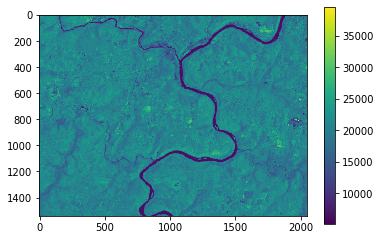

In [13]:
for i in range(1):
    plt.imshow(pix_array[i,:,:])
    plt.colorbar()
    plt.show()

We also extracted a **mask** and the **props** variables. Let's see what they contain.

In [15]:
filename = 'singleDataset_2019_Dec_23_19_32_24props.p'
pickle_file = os.path.join(debug_logs_directory, filename)
props = pickle.load(open(pickle_file,"rb"))
print(props)

{'cellSize': (12.990949273360876, 12.990949273361014), 'extent': (-8899553.727310175, 5055012.199351707, -8872896.299401239, 5075018.2612326825), 'pixelType': 'u2', 'noData': None, 'width': 2052, 'height': 1540, 'spatialReference': 3857}


**props** is a dictionary of raster properties. We can acces different roperties such as *cellSize*.

In [17]:
print(props['cellSize'])

(12.990949273360876, 12.990949273361014)


The **mask** is just an array of zeros that you can use as a mask on your pixel blocks.

In [18]:
filename = 'singleDataset_2019_Dec_23_19_32_24mask.p'#'BaseDebugTemplate_2019_Dec_16_20_23_15pix_blocks.p'
pickle_file = os.path.join(debug_logs_directory, filename)
mask = pickle.load(open(pickle_file,"rb"))
mask_array = np.asarray(mask)

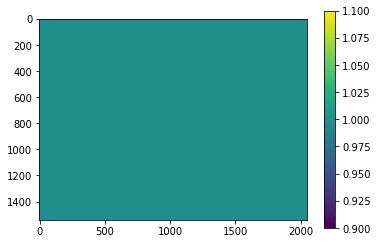

In [19]:
for i in range(1):
    plt.imshow(mask[i,:,:])
    plt.colorbar()
    plt.show()

# Use Case 2 - Application to a Mosaic Dataset

I will apply the same raster function to a mosaic dataset

In [23]:
filename = 'singleDataset_2019_Dec_23_19_39_41pix_blocks.p'
#filename = 'singleDataset_2019_Dec_12_14_31_49pix_blocks.p'
pickle_file = os.path.join(debug_logs_directory, filename)
pix_blocks = pickle.load(open(pickle_file,"rb"))
pix_array = np.asarray(pix_blocks)

In [24]:
pix_array.shape

(9, 1540, 2052)

Notice that the mosaic has all 9 bands configured.

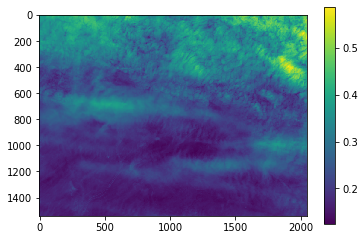

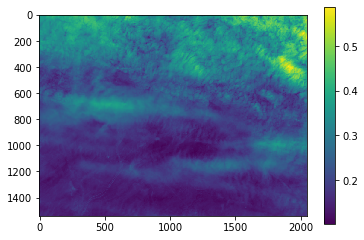

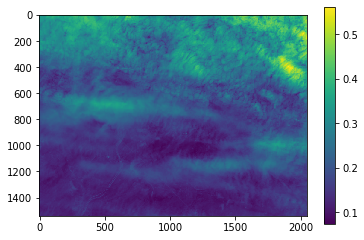

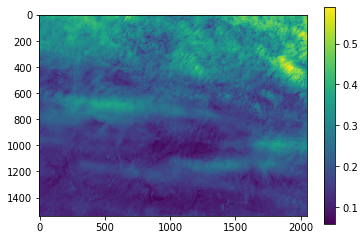

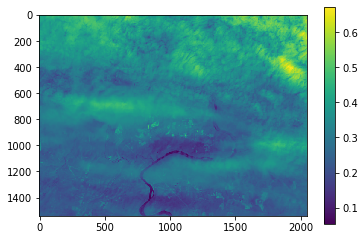

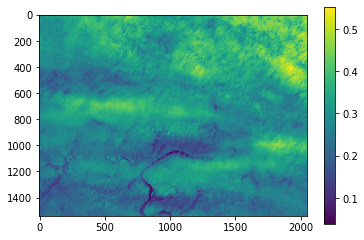

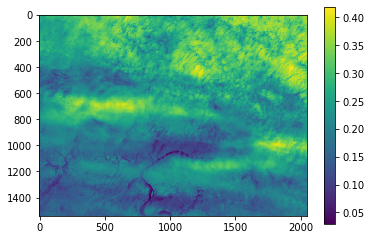

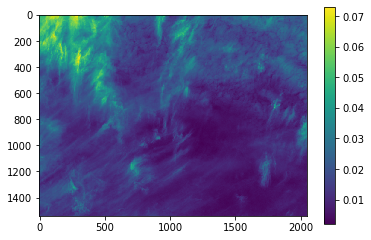

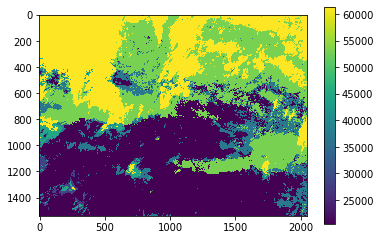

In [25]:
for i in range(9):
    plt.imshow(pix_array[i,:,:])
    plt.colorbar()
    plt.show()

## Saving the ```props``` variable

We can also save out the ```props``` variables again.

In [26]:
filename = 'singleDataset_2019_Dec_23_19_39_41props.p'
pickle_file = os.path.join(debug_logs_directory, filename)
props = pickle.load(open(pickle_file,"rb"))
print(props)
print(props['cellSize'])

{'cellSize': (12.990949273360876, 12.990949273361014), 'extent': (-8899553.727310171, 5055012.199351703, -8872896.299401235, 5075018.261232679), 'pixelType': 'f4', 'noData': None, 'width': 2052, 'height': 1540, 'spatialReference': 3857}
(12.990949273360876, 12.990949273361014)


# Use Case 3 - Input is Rasters and KeyMetadata is defined
Let's use the Advanced Debug Template and see what kind of Metadata we can extract from the rasters and mosaic. This time, we will configure our raster function template a little bit different.

In [27]:
filename = 'Advanced_2019_Dec_23_19_47_40pix_blocks.p'
#filename = 'singleDataset_2019_Dec_12_14_31_49pix_blocks.p'
pickle_file = os.path.join(debug_logs_directory, filename)
pix_blocks = pickle.load(open(pickle_file,"rb"))
pix_array = np.asarray(pix_blocks)

In [28]:
pix_array.shape

(1, 1, 1540, 2052)

Notice that we now have a fourth Dimmension. This is becuase our input is **Rasters** plaurel.

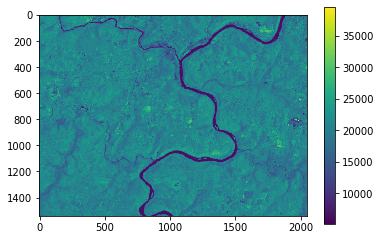

In [29]:
for i in range(1):
    plt.imshow(pix_array[0,i,:,:])
    plt.colorbar()
    plt.show()

In [30]:
time_filename = 'Advanced_2019_Dec_23_19_47_40pix_time.p'
pickle_file = os.path.join(debug_logs_directory, time_filename)
metadata = pickle.load(open(pickle_file,"rb"))
metadata

({},)

Metadata structure isn't populated. The extra dimmension in the pixel blocks is only there becuase the input is **Rasters** plaurel

# Use Case 4 - Embeding the Raster Function and Extracting 4 Dimmensions Plus Key Metadata

Here, I applied the same raster function as above, but I used **Item Grouping**. This gives us access to a subset of items withing the mosaic dataset.

In [31]:
filename = 'Advanced_2019_Dec_23_19_53_34pix_blocks.p'
#filename = 'singleDataset_2019_Dec_12_14_31_49pix_blocks.p'
pickle_file = os.path.join(debug_logs_directory, filename)
pix_blocks = pickle.load(open(pickle_file,"rb"))
pix_array = np.asarray(pix_blocks)

In [32]:
pix_array.shape

(2, 9, 336, 540)

Now the array has 4 dimmensions and the first dimmension corresponds to time.

In [33]:
time_filename = 'Advanced_2019_Dec_23_19_53_34pix_time.p'
pickle_file = os.path.join(debug_logs_directory, time_filename)
metadata = pickle.load(open(pickle_file,"rb"))
metadata

({'acquisitiondate': 42087.66496130787},
 {'acquisitiondate': 42071.665063726854})

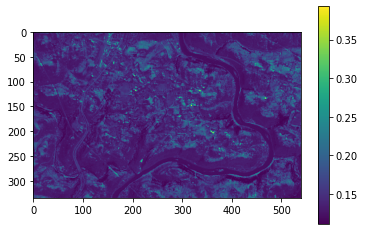

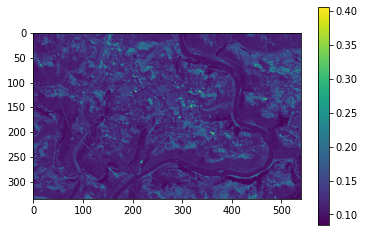

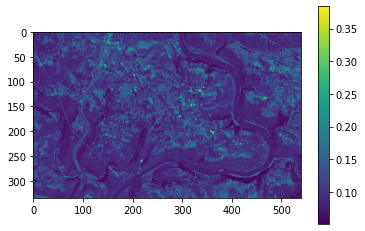

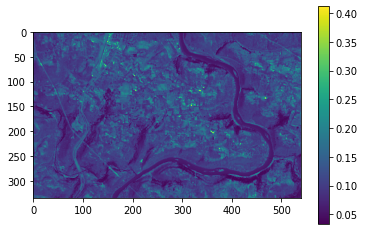

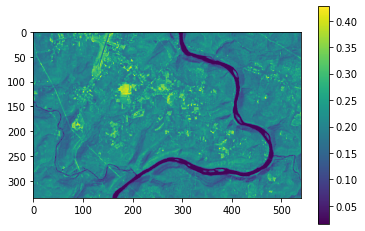

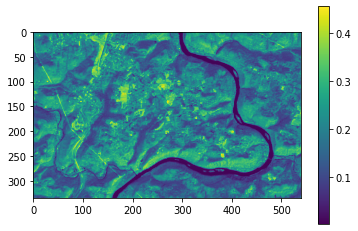

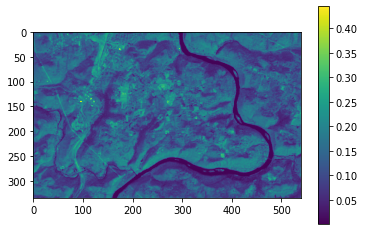

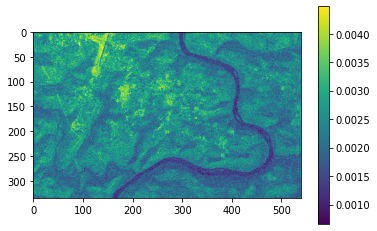

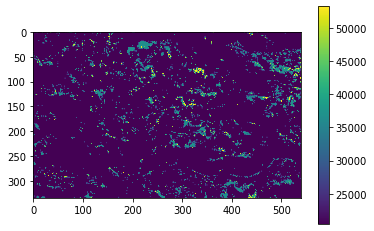

In [34]:
for i in range(9):
    plt.imshow(pix_array[0,i,:,:])
    plt.colorbar()
    plt.show()

## Filtering using the Pro Time Slider Works!!!
Notice that if you change the time slider, the number of bands you read in changes.

In [35]:
filename = 'Advanced_2019_Dec_23_20_01_21pix_blocks.p'
#filename = 'singleDataset_2019_Dec_12_14_31_49pix_blocks.p'
pickle_file = os.path.join(debug_logs_directory, filename)
pix_blocks = pickle.load(open(pickle_file,"rb"))
pix_array = np.asarray(pix_blocks)

In [36]:
pix_array.shape

(8, 9, 336, 540)

In [37]:
time_filename = 'Advanced_2019_Dec_23_20_01_21pix_time.p'
pickle_file = os.path.join(debug_logs_directory, time_filename)
metadata = pickle.load(open(pickle_file,"rb"))
metadata

({'acquisitiondate': 42087.66496130787},
 {'acquisitiondate': 42071.665063726854},
 {'acquisitiondate': 42039.665240173614},
 {'acquisitiondate': 42055.665158275464},
 {'acquisitiondate': 41975.66541693287},
 {'acquisitiondate': 42023.66528021991},
 {'acquisitiondate': 41991.665374537035},
 {'acquisitiondate': 42007.66531497685})

## Changing mosaic dataset parameters
Now that we know how this works, we should change the follwing mosaic dataset parameters:
- maximum number of rasters per mosaic: increase that from 20
- mosaic method: set to closest to center
- always clip raster to its footprint: uncheck that